In [ ]:
from keras.layers import Input, Dense, Flatten, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.utils import np_utils
from keras import backend as K
import numpy as np
import os
from keras.regularizers import l2
import tensorflow as tf
import time
import datetime
import argparse
import datetime
import socket
import keras 
from sklearn import preprocessing
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import time
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image, ImageOps
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
##### For one-hot label
from keras.utils import np_utils


In [ ]:
nb_classes = 397
img_depth = 3
data_dir ='/content/drive/My Drive/Colab Notebooks/SUN_Practice/'+'SUN397'
train_img_file = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Training_01.txt'   # Training_01.txt
test_img_file = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Testing_01.txt'     # Testing_01.txt
classes_name_list = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/ClassName.txt'
train_label_file ='/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/ClassName.txt'
test_label_file = '/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/ClassName.txt'

train_img_file_path='/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Training_01.txt'
test_img_file_path='/content/drive/My Drive/Colab Notebooks/SUN_Practice/Partitions/Testing_01.txt'


In [ ]:
print('Begin to create a map to tansfer the str label to int label...')
class_name_file =  classes_name_list
class_str = [str(line.strip()) for line in open(class_name_file).readlines()]
class_count = len(class_str)
print('%d class names are loaded' % class_count)
        # begin to create the map
le = preprocessing.LabelEncoder()
le.fit(class_str)
print(list(le.classes_))
print('Label map created...')


# **load training data**

In [ ]:
print('\nBegin to load training data...\n')
desired_img_dim=224
print('Loading image file %s' % train_img_file_path)

In [ ]:
start_time_ = time.time()
train_img_file_path = [str(line.strip()) for line in open(train_img_file_path).readlines()]  # read all the image file name
nb_sample = len(train_img_file_path)
print('Image count: %d' % nb_sample)

data_resized_holder = np.empty([nb_sample, desired_img_dim, desired_img_dim, img_depth], dtype='float32')

for idx in range(nb_sample):
    img_file1 = train_img_file_path[idx].replace("\\", "/")     # the image file path
    # print(str(img_file1))
    # 1. read the image
    img1 = image.load_img(data_dir+img_file1)

    # 2. resize
    img1 = img1.resize((desired_img_dim, desired_img_dim), resample=0)


    # 6. give to the holder
    data_resized_holder[idx] = img1
    if(idx % 1000==0):
        print('%d image loaded.' % idx)

print('\nImage file loaded, the shape is ' + str(data_resized_holder.shape))


**loading the training labels text**

In [ ]:
one_hot = True
print('Loading label file %s' % train_label_file)
label_str = [str(line.strip()) for line in open(train_label_file).readlines()]
nb_unique = len(label_str)
labels_unique = le.transform(label_str)
# print(labels_unique)
labels_holder = np.hstack((  [ labels_unique[i] ] * 50 for i in range(nb_unique)))
# print(labels_holder)
nb_sample = len(labels_holder)
if one_hot == True:
    labels = np.array([[float(i == l) for i in range(nb_classes)] for l in labels_holder])
else:
    labels = labels_holder
print('Labels loaded, shape is:' + str(labels.shape))



**loading training data**

In [ ]:
x_train, nb_train_sample_1 = data_resized_holder, nb_sample

In [ ]:
y_train, nb_train_sample_2 = labels, nb_sample

In [ ]:
del data_resized_holder
del labels

# **Saving train data and test data**

**Saving x_train y_train as .npy  file**

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/x_tain.npy',x_train)

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/y_train.npy',y_train)

# **loading testing data**

**load testing data**

In [ ]:
print('Loading image file %s' % test_img_file_path )
start_time_ = time.time()
test_img_file_path = [str(line.strip()) for line in open(test_img_file_path).readlines()]  # read all the image file name
nb_sample = len(test_img_file_path)
print('Image count: %d' % nb_sample)

data_resized_holder = np.empty([nb_sample, desired_img_dim, desired_img_dim, img_depth], dtype='float32')

for idx in range(nb_sample):
    img_file1 = data_dir + test_img_file_path[idx].replace("\\", "/")     # the image file path
    # print(str(img_file1))
    # 1. read the image
    img1 = image.load_img(img_file1)

    # 2. resize
    img1 = img1.resize((desired_img_dim, desired_img_dim), resample=0)


    # 6. give to the holder
    data_resized_holder[idx] = img1
    if(idx % 1000==0):
        print('%d image loaded.' % idx)

print('\nImage file loaded, the shape is ' + str(data_resized_holder.shape))



**Load test labels**

In [ ]:
one_hot = True
# loading the training labels
print('Loading label file %s' % test_label_file)
label_str = [str(line.strip()) for line in open(test_label_file).readlines()]
nb_unique = len(label_str)
labels_unique = le.transform(label_str)
# print(labels_unique)
labels_holder = np.hstack((  [ labels_unique[i] ] * 50 for i in range(nb_unique)))
# print(labels_holder)
nb_sample = len(labels_holder)
if one_hot == True:
    labels = np.array([[float(i == l) for i in range(nb_classes)] for l in labels_holder])
else:
    labels = labels_holder
print('Labels loaded, shape is:' + str(labels.shape))



In [ ]:
x_test, nb_test_sample_1 = data_resized_holder, nb_sample

In [ ]:
y_test, nb_test_sample_2 = labels, nb_sample

In [ ]:
del data_resized_holder
del labels

**Saving x_test y_test .npy file**

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/x_test.npy',x_test)

In [ ]:
np.save('/content/drive/My Drive/Colab Notebooks/SUN_Practice/y_test.npy',y_test)

In [ ]:
del x_test
del y_test

# **Load train data and test data**

**Load train data**

In [2]:
x_train = np.load('/root/Code_GCP/SUN_Practice/x_tain.npy')

In [3]:
y_train = np.load('/root/Code_GCP/SUN_Practice/y_train.npy')

**Load test data**

**Load the training data and testing data from the npy file.X means input data and y means the label of the sample.**

In [4]:
x_test = np.load('/root/Code_GCP/SUN_Practice/x_test.npy')

In [5]:
y_test = np.load('/root/Code_GCP/SUN_Practice/y_test.npy')

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(19850, 224, 224, 3)
(19850, 397)
(19850, 224, 224, 3)
(19850, 397)


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [1]:
import numpy as np
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet201

/root/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:

# x_train=np.load("x_train.npy")
# x_test=np.load("x_test.npy")
# y_train=np.load("y_train.npy")
# y_test=np.load("y_test.npy")
# print(y_test.shape)

(19850, 397)


**Data processing**

In [3]:
from keras.applications.densenet import preprocess_input

x_test = preprocess_input(x_test)
x_train = preprocess_input(x_train)

**Call the DenseNet model function of Keras. Use a pretrained weights on imagenet. We don't use the top layer of DenseNet, because in order to get a better perform we want to biuld FC layers by ourselves. The input shape is 227*227*3, 227*227 means resolution and 3 means number of channel.**

In [4]:
model = DenseNet201(weights="imagenet", include_top=False, classes=397, input_shape=(224,224,3))
print(model.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

**We add a average pooling layer after the relu layer. And we add a softmax layer to predict the 397 classes.**

In [5]:
from keras.layers import Flatten, Dense, Dropout
from keras.models import Model
from keras.layers.pooling import GlobalAveragePooling2D

x = model.get_layer('relu').output
x = GlobalAveragePooling2D(name='pool')(x)
x = Dense(397, activation='softmax', name='fc1')(x)

model_updated = Model(inputs=model.input, outputs=x)


**Its more convenient to save the pretrained weights because we need to repeat the experiment for 3 times.**

In [6]:
model_updated.save_weights('model_initial.h5')

In [7]:
def learning_rate_schedule(epoch):
    if epoch <= 10:
        return 1e-4 # 0.00001
    elif epoch <= 20:
        return 1e-5
    elif epoch <= 30:
        return 1e-6
    else:
        return 1e-7
    return LR

**Train the DenseNet. Use categorical crossentropy as loss function and use the learning rate schedule we have defined. Use the data we have loaded and set the batch size as 32 and train for 7 epochs. Repeat the experiment for 3 times and save the weight we trained.**

In [10]:
from keras import optimizers
from keras.callbacks import EarlyStopping

model_updated.load_weights('model_initial.h5')
training_runs = []
for i in range(3):
    model_updated.compile(loss='categorical_crossentropy', optimizer=optimizers.adam(lr=0.0001), metrics=['accuracy'])
    keras.callbacks.LearningRateScheduler(learning_rate_schedule)
    history = model_updated.fit(x_train, y_train, batch_size=32, shuffle=True, epochs=7, validation_data=(x_test, y_test))
    training_runs.append(history)
    model_updated.get_weights()
    if i == 2:
        model_updated.save_weights('model1_from_scratch.h5')
    else:
        model_updated.load_weights('model_initial.h5')

Train on 19850 samples, validate on 19850 samples
Epoch 1/7
19850/19850 [==============================] - 395s 20ms/step - loss: 3.7642 - acc: 0.2728 - val_loss: 2.3402 - val_acc: 0.4478
Epoch 2/7
19850/19850 [==============================] - 342s 17ms/step - loss: 1.6678 - acc: 0.6327 - val_loss: 1.8257 - val_acc: 0.5383
Epoch 3/7
19850/19850 [==============================] - 342s 17ms/step - loss: 0.8549 - acc: 0.8254 - val_loss: 1.7113 - val_acc: 0.5602
Epoch 4/7
19850/19850 [==============================] - 342s 17ms/step - loss: 0.3837 - acc: 0.9392 - val_loss: 1.6612 - val_acc: 0.5647
Epoch 5/7
19850/19850 [==============================] - 343s 17ms/step - loss: 0.1469 - acc: 0.9891 - val_loss: 1.5617 - val_acc: 0.5966
Epoch 6/7
19850/19850 [==============================] - 343s 17ms/step - loss: 0.0596 - acc: 0.9980 - val_loss: 1.5687 - val_acc: 0.5951
Epoch 7/7
19850/19850 [==============================] - 343s 17ms/step - loss: 0.0278 - acc: 0.9999 - val_loss: 1.5764 - 

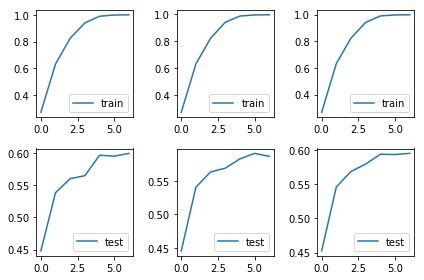

In [15]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(2, 3, 1)
plt.plot(training_runs[0].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 2)
plt.plot(training_runs[1].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 3)
plt.plot(training_runs[2].history['acc'])
plt.legend(['train'], loc='lower right')

plt.subplot(2, 3, 4)
plt.plot(training_runs[0].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 5)
plt.plot(training_runs[1].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.subplot(2, 3, 6)
plt.plot(training_runs[2].history['val_acc'])
plt.legend(['test'], loc='lower right')

plt.tight_layout() 

plt.show()

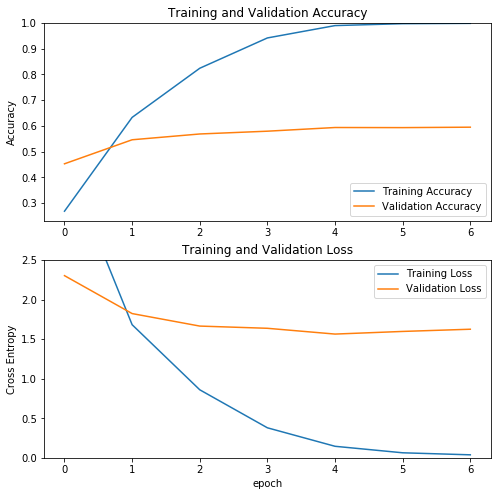

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.5])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [13]:
print("Average training accuracy: {}".format(np.mean([training_runs[0].history['acc'][-1], 
                                                     training_runs[1].history['acc'][-1], training_runs[2].history['acc'][-1]])))
print("Average testing accuracy: {}".format(np.mean([training_runs[0].history['val_acc'][-1], 
                                                     training_runs[1].history['val_acc'][-1], training_runs[2].history['val_acc'][-1]])))

Average training accuracy: 0.9984550797649034
Average testing accuracy: 0.5937027707793551


**In the end, we got the best accuracy in DenseNet201. We only train the network for 7 epochs and the loss and accuracy become stable. We repeat the experiment for 3 times and the performances are very solid. The average testing accuracy reaches 59.37%.**

# Conclusion

**In this project, we selected the scene test set Sun397. By selecting 50 sheets as training data and 50 sheets as testing data in each class, we built training dataset and testing dataset. The purpose of this is to make it better. Training network. We use a variety of network models for testing, such as: VGG16 based on imagenet weights and VGG16 based on places365 weights. and DenseNet121 and more layers of DenseNet201 model. Because the size of this data set is 39GB, ordinary machines can't complete this task. We selected Colab and Google Cloud Platform for experiment. Finally, we completed the experiment and achieved the best accuracy with DenseNet 201: 59.37%.**